In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-beds-management/staff.csv
/kaggle/input/hospital-beds-management/patients.csv
/kaggle/input/hospital-beds-management/staff_schedule.csv
/kaggle/input/hospital-beds-management/services_weekly.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
staff = pd.read_csv('/kaggle/input/hospital-beds-management/staff.csv')
patients = pd.read_csv('/kaggle/input/hospital-beds-management/patients.csv')
service_weekly = pd.read_csv('/kaggle/input/hospital-beds-management/services_weekly.csv')
staff_schedule = pd.read_csv('/kaggle/input/hospital-beds-management/staff_schedule.csv')

In [4]:
print("Staff columns:", staff.columns.tolist())
print("Patients columns:", patients.columns.tolist())
print("Service weekly columns:", service_weekly.columns.tolist())
print("Staff schedule columns:", staff_schedule.columns.tolist())

Staff columns: ['staff_id', 'staff_name', 'role', 'service']
Patients columns: ['patient_id', 'name', 'age', 'arrival_date', 'departure_date', 'service', 'satisfaction']
Service weekly columns: ['week', 'month', 'service', 'available_beds', 'patients_request', 'patients_admitted', 'patients_refused', 'patient_satisfaction', 'staff_morale', 'event']
Staff schedule columns: ['week', 'staff_id', 'staff_name', 'role', 'service', 'present']


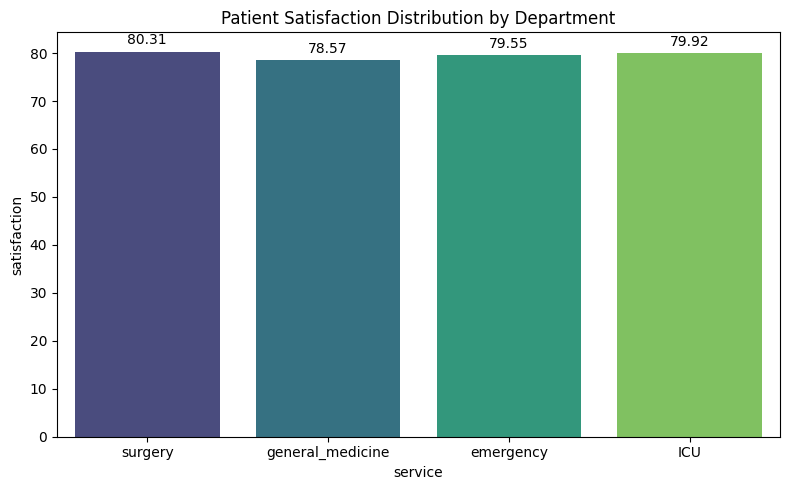

In [5]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=patients, x="service", y="satisfaction", estimator="mean", errorbar=None, palette="viridis")
plt.title("Patient Satisfaction Distribution by Department")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


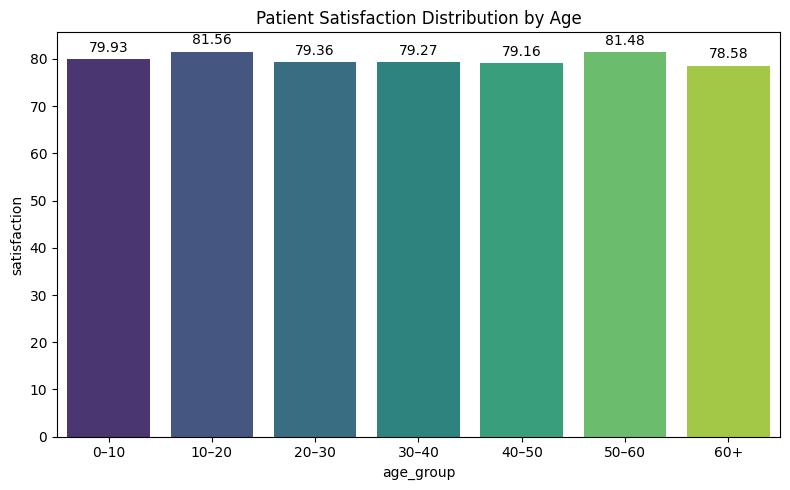

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 150]
labels = ["0–10", "10–20", "20–30", "30–40", "40–50", "50–60", "60+"]

# Create a new column for age group
patients["age_group"] = pd.cut(patients["age"], bins=bins, labels=labels, right=False)

age_mean = (
    patients.groupby("age_group", as_index=False, observed=True)["satisfaction"]
    .mean()
)
plt.figure(figsize=(8,5))
ax=ax = sns.barplot(
    data=age_mean,
    x="age_group",
    y="satisfaction",
    palette="viridis"
)
plt.title("Patient Satisfaction Distribution by Age")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.tight_layout()
plt.show()


Age Also have no effect on patient statisfaction. Now maybe arrival_date and departure_date months

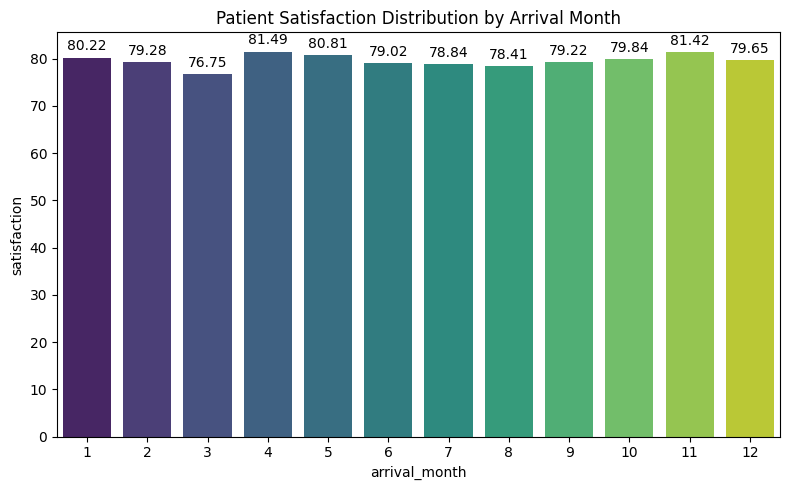

In [7]:
# Arrival months satisfaction

patients['arrival_month'] = patients['arrival_date'].str[5:7].astype(int)

plt.figure(figsize=(8,5))
ax=sns.barplot(data=patients, x="arrival_month", y="satisfaction", estimator="mean", errorbar=None, palette="viridis")
plt.title("Patient Satisfaction Distribution by Arrival Month")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.tight_layout()
plt.show()



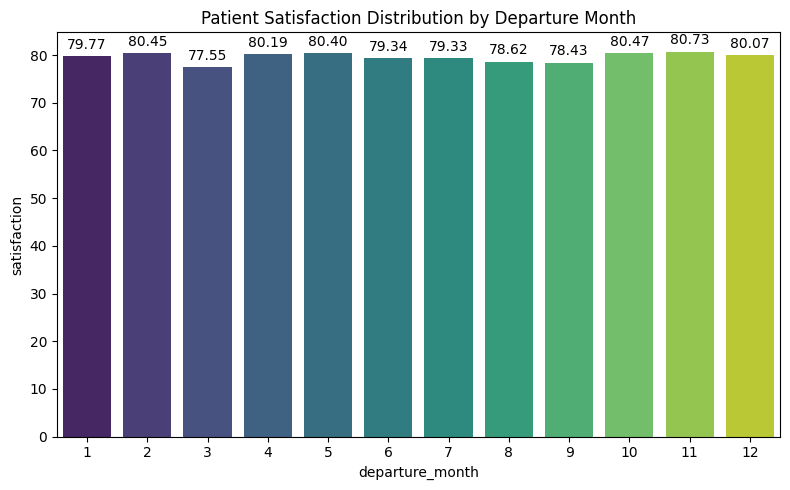

In [8]:
# Depature months satisfaction

patients['departure_month'] = patients['departure_date'].str[5:7].astype(int)

plt.figure(figsize=(8,5))
ax=sns.barplot(data=patients, x="departure_month", y="satisfaction", estimator="mean", errorbar=None, palette="viridis")
plt.title("Patient Satisfaction Distribution by Departure Month")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.tight_layout()
plt.show()

Month of march has some problem with statisfication level. Now printing values against different service_weekly.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


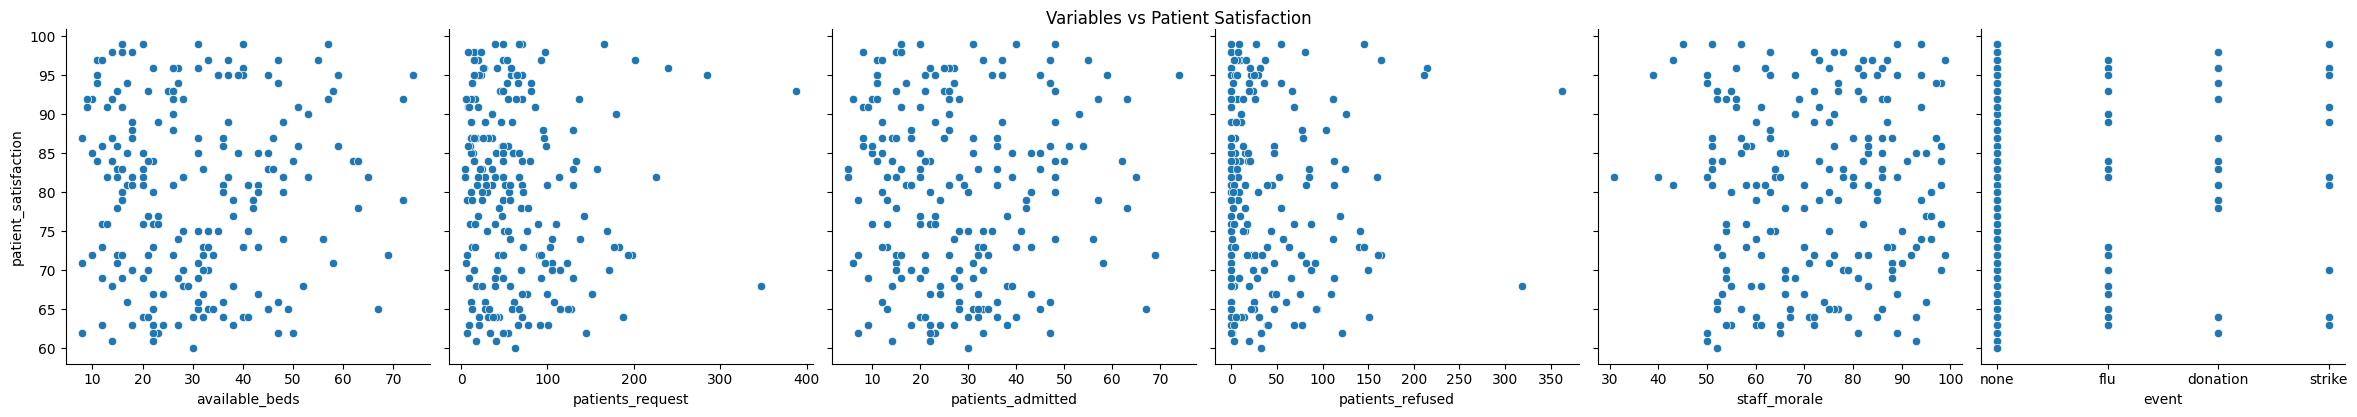

In [9]:
cols_to_plot = ['available_beds', 'patients_request', 'patients_admitted',
                'patients_refused', 'staff_morale', 'event', 'patient_satisfaction']

# Pairplot
sns.pairplot(service_weekly[cols_to_plot], y_vars=['patient_satisfaction'], x_vars=cols_to_plot[:-1], height=4, aspect=1)
plt.suptitle("Variables vs Patient Satisfaction", y=1.02)
plt.show()

Overall, patient satisfaction depends on the patient’s overall experience and perception; no single factor appears to have a significant impact on their satisfaction.